<img src="../images/UBRA_Logo_DATA_TRAIN.png" style="width: 800px;">

## NetCDF files

We are going to work with data from [NCEP/NCAR Reanalysis I](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html). We have to download it and try to make sence of what is inside those files.
 


In [2]:
pip install xarray netcdf4

  Using cached netCDF4-1.7.1.post2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached cftime-1.6.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.4 MB/s eta 0:00:0000:0100:01
Using cached netCDF4-1.7.1.post2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.2 MB)
Using cached cftime-1.6.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import xarray as xr
import matplotlib.pylab as plt
# xr.set_options(display_style="text") #uncomment if you can't display html 

In [4]:
ds = xr.open_dataset('../data/air.2m.gauss.2021.nc')

In [5]:
ds

<xarray.Dataset> Size: 14MB
Dimensions:    (lat: 94, lon: 192, time: 196, nbnds: 2)
Coordinates:
  * lat        (lat) float32 376B 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 768B 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2kB 2021-01-01 2021-01-02 ... 2021-07-15
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 14MB ...
    time_bnds  (time, nbnds) float64 3kB ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [6]:
ds.air

<xarray.DataArray 'air' (time: 196, lat: 94, lon: 192)> Size: 14MB
[3537408 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 2kB 2021-01-01 2021-01-02 ... 2021-07-15
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [178.1   317.025]

In [7]:
ds['air']

<xarray.DataArray 'air' (time: 196, lat: 94, lon: 192)> Size: 14MB
[3537408 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 2kB 2021-01-01 2021-01-02 ... 2021-07-15
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [178.1   317.025]

In [8]:
ds.air.shape

(196, 94, 192)

In [9]:
ds.air[0,:,:]

<xarray.DataArray 'air' (lat: 94, lon: 192)> Size: 72kB
[18048 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    time     datetime64[ns] 8B 2021-01-01
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [178.1   317.025]

In [10]:
ds.air[0,:,:].values

array([[263.40002, 263.475  , 263.5    , ..., 263.225  , 263.30002,
        263.35004],
       [260.69998, 260.95   , 261.22498, ..., 259.92502, 260.175  ,
        260.42502],
       [262.27502, 262.8    , 263.325  , ..., 260.55   , 261.15   ,
        261.69998],
       ...,
       [251.475  , 251.65001, 251.85   , ..., 251.09999, 251.175  ,
        251.35   ],
       [248.54999, 248.625  , 248.67499, ..., 248.34999, 248.40001,
        248.5    ],
       [246.72499, 246.72499, 246.75   , ..., 246.72499, 246.72499,
        246.72499]], dtype=float32)

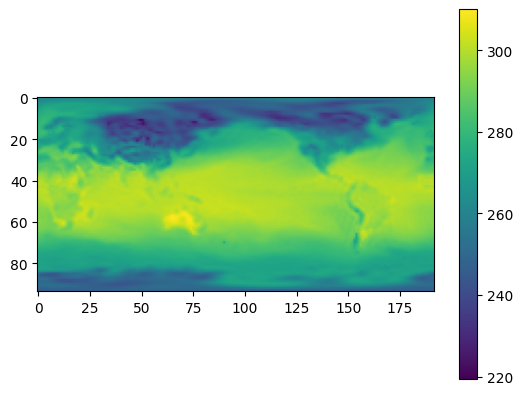

In [11]:
plt.imshow(ds.air[0,:,:].values)
plt.colorbar()

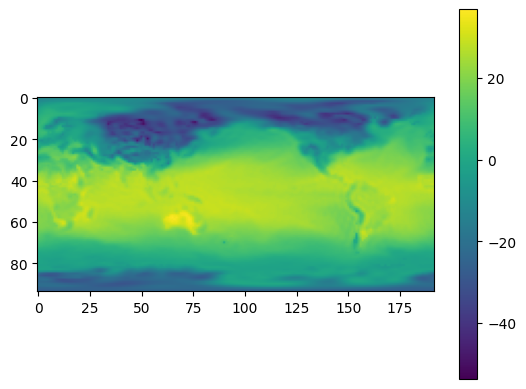

In [12]:
plt.imshow(ds.air[0,:,:].values-273.15)
plt.colorbar()

In [13]:
ds.lon

<xarray.DataArray 'lon' (lon: 192)> Size: 768B
array([  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,  11.25 ,  13.125,
        15.   ,  16.875,  18.75 ,  20.625,  22.5  ,  24.375,  26.25 ,  28.125,
        30.   ,  31.875,  33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
        45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,  56.25 ,  58.125,
        60.   ,  61.875,  63.75 ,  65.625,  67.5  ,  69.375,  71.25 ,  73.125,
        75.   ,  76.875,  78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
        90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375, 101.25 , 103.125,
       105.   , 106.875, 108.75 , 110.625, 112.5  , 114.375, 116.25 , 118.125,
       120.   , 121.875, 123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
       135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375, 146.25 , 148.125,
       150.   , 151.875, 153.75 , 155.625, 157.5  , 159.375, 161.25 , 163.125,
       165.   , 166.875, 168.75 , 170.625, 172.5  , 174.375, 176.25 , 178.125,
       180.   , 181.875, 183.75 , 185.625, 187.5  , 189.375, 191.25 , 193.125,
       195.   , 196.875, 198.75 , 200.625, 202.5  , 204.375, 206.25 , 208.125,
       210.   , 211.875, 213.75 , 215.625, 217.5  , 219.375, 221.25 , 223.125,
       225.   , 226.875, 228.75 , 230.625, 232.5  , 234.375, 236.25 , 238.125,
       240.   , 241.875, 243.75 , 245.625, 247.5  , 249.375, 251.25 , 253.125,
       255.   , 256.875, 258.75 , 260.625, 262.5  , 264.375, 266.25 , 268.125,
       270.   , 271.875, 273.75 , 275.625, 277.5  , 279.375, 281.25 , 283.125,
       285.   , 286.875, 288.75 , 290.625, 292.5  , 294.375, 296.25 , 298.125,
       300.   , 301.875, 303.75 , 305.625, 307.5  , 309.375, 311.25 , 313.125,
       315.   , 316.875, 318.75 , 320.625, 322.5  , 324.375, 326.25 , 328.125,
       330.   , 331.875, 333.75 , 335.625, 337.5  , 339.375, 341.25 , 343.125,
       345.   , 346.875, 348.75 , 350.625, 352.5  , 354.375, 356.25 , 358.125],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  0.    358.125]
    standard_name:  longitude
    axis:           X

In [14]:
ds.lon.values

array([  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,  11.25 ,
        13.125,  15.   ,  16.875,  18.75 ,  20.625,  22.5  ,  24.375,
        26.25 ,  28.125,  30.   ,  31.875,  33.75 ,  35.625,  37.5  ,
        39.375,  41.25 ,  43.125,  45.   ,  46.875,  48.75 ,  50.625,
        52.5  ,  54.375,  56.25 ,  58.125,  60.   ,  61.875,  63.75 ,
        65.625,  67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,
        78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,  90.   ,
        91.875,  93.75 ,  95.625,  97.5  ,  99.375, 101.25 , 103.125,
       105.   , 106.875, 108.75 , 110.625, 112.5  , 114.375, 116.25 ,
       118.125, 120.   , 121.875, 123.75 , 125.625, 127.5  , 129.375,
       131.25 , 133.125, 135.   , 136.875, 138.75 , 140.625, 142.5  ,
       144.375, 146.25 , 148.125, 150.   , 151.875, 153.75 , 155.625,
       157.5  , 159.375, 161.25 , 163.125, 165.   , 166.875, 168.75 ,
       170.625, 172.5  , 174.375, 176.25 , 178.125, 180.   , 181.875,
       183.75 , 185.

In [15]:
ds.time

<xarray.DataArray 'time' (time: 196)> Size: 2kB
array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-06T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-08T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-13T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-15T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-17T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-01-19T00:00:00.000000000', '2021-01-20T00:00:00.000000000',
       '2021-01-21T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-23T00:00:00.000000000', '2021-01-24T00:00:00.000000000',
       '2021-01-25T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-27T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-01-29T00:00:00.000000000', '2021-01-30T00:00:00.000000000',
       '2021-01-31T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-02-02T00:00:00.000000000', '2021-02-03T00:00:00.000000000',
       '2021-02-04T00:00:00.000000000', '2021-02-05T00:00:00.000000000',
       '2021-02-06T00:00:00.000000000', '2021-02-07T00:00:00.000000000',
       '2021-02-08T00:00:00.000000000', '2021-02-09T00:00:00.000000000',
       '2021-02-10T00:00:00.000000000', '2021-02-11T00:00:00.000000000',
       '2021-02-12T00:00:00.000000000', '2021-02-13T00:00:00.000000000',
       '2021-02-14T00:00:00.000000000', '2021-02-15T00:00:00.000000000',
       '2021-02-16T00:00:00.000000000', '2021-02-17T00:00:00.000000000',
       '2021-02-18T00:00:00.000000000', '2021-02-19T00:00:00.000000000',
       '2021-02-20T00:00:00.000000000', '2021-02-21T00:00:00.000000000',
       '2021-02-22T00:00:00.000000000', '2021-02-23T00:00:00.000000000',
       '2021-02-24T00:00:00.000000000', '2021-02-25T00:00:00.000000000',
       '2021-02-26T00:00:00.000000000', '2021-02-27T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-03-02T00:00:00.000000000', '2021-03-03T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-03-05T00:00:00.000000000',
       '2021-03-06T00:00:00.000000000', '2021-03-07T00:00:00.000000000',
       '2021-03-08T00:00:00.000000000', '2021-03-09T00:00:00.000000000',
       '2021-03-10T00:00:00.000000000', '2021-03-11T00:00:00.000000000',
       '2021-03-12T00:00:00.000000000', '2021-03-13T00:00:00.000000000',
       '2021-03-14T00:00:00.000000000', '2021-03-15T00:00:00.000000000',
       '2021-03-16T00:00:00.000000000', '2021-03-17T00:00:00.000000000',
       '2021-03-18T00:00:00.000000000', '2021-03-19T00:00:00.000000000',
       '2021-03-20T00:00:00.000000000', '2021-03-21T00:00:00.000000000',
       '2021-03-22T00:00:00.000000000', '2021-03-23T00:00:00.000000000',
       '2021-03-24T00:00:00.000000000', '2021-03-25T00:00:00.000000000',
       '2021-03-26T00:00:00.000000000', '2021-03-27T00:00:00.000000000',
       '2021-03-28T00:00:00.000000000', '2021-03-29T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-04-02T00:00:00.000000000',
       '2021-04-03T00:00:00.000000000', '2021-04-04T00:00:00.000000000',
       '2021-04-05T00:00:00.000000000', '2021-04-06T00:00:00.000000000',
       '2021-04-07T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2021-04-10T00:00:00.000000000',
       '2021-04-11T00:00:00.000000000', '2021-04-12T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-04-14T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-04-16T00:00:00.000000000',
       '2021-04-17T00:00:00.000000000', '2021-04-18T00:00:00.000000000',
       '20

In [16]:
ds.time.values[0]

np.datetime64('2021-01-01T00:00:00.000000000')

In [17]:
str(ds.time.values[0])

'2021-01-01T00:00:00.000000000'

[More on numpy datetime type.](https://numpy.org/doc/stable/reference/arrays.datetime.html)

## Exersise

- select 100th time step from our netCDF file.
- what is the date, that is associated with this timestep?
- plot the data